# Customer Sentiment Analysis 

### Data and Guiding Prompts:

* You have been supplied with several thousand single-sentence reviews, collected from three domains: imdb.com, amazon.com, and yelp.com. Each review consists of a sentence, and has been assigned a binary label indicating the sentiment (1 for positive and 0 for negative) of that sentence. Your goal is to develop binary classifiers that can generate the sentiment-labels for new sentences, automating the assessment process. While the reviews were collected from websites where much of the content is in English, the reviews may well contain slang, spelling errors, foreign characters and the like, all of which make natural language data challenging, albeit fun, to try to classify like this.

* Examples of positive reviews include:
    * (amazon) #1 It Works - #2 It is Comfortable.
    * (imdb) "Gotta love those close-ups of slimy, drooling teeth! "
    * (yelp) Food was so gooodd.

* Examples of negative reviews include:
    * (amazon) DO NOT BUY DO NOT BUYIT SUCKS
    * (imdb) This is not movie-making.
    * (yelp) The service was poor and thats being nice.

In [9]:
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer


### Data Cleaning/Pre-Processing:

* It is recommended that you preprocess your data, removing punctuation, non-English and non-text characters, and unifying the case (i.e., setting everything to be either upper- or lower-case). You will then investigate feature representations for converting strings of words in sentence form into feature vectors xn of some common length n, and use those feature representations to build and compare a number of di erent types of models.

In [10]:
x_train_df = pd.read_csv('/Users/maidaraza/Desktop/Tufts/Course Content/CS 135 - Introduction to Machine Learning and Data Mining/Assignments/project02/data/data_reviews/x_train.csv')
y_train_df = pd.read_csv('/Users/maidaraza/Desktop/Tufts/Course Content/CS 135 - Introduction to Machine Learning and Data Mining/Assignments/project02/data/data_reviews/y_train.csv')
x_test_df = pd.read_csv('/Users/maidaraza/Desktop/Tufts/Course Content/CS 135 - Introduction to Machine Learning and Data Mining/Assignments/project02/data/data_reviews/x_test.csv')

tr_text_list = x_train_df['text'].values.tolist()
for text in tr_text_list:
    print(text)


Oh and I forgot to also mention the weird color effect it has on your phone.
THAT one didn't work either.
Waste of 13 bucks.
Product is useless, since it does not have enough charging current to charge the 2 cellphones I was planning to use it with.
None of the three sizes they sent with the headset would stay in my ears.
Worst customer service.
The Ngage is still lacking in earbuds.
It always cuts out and makes a beep beep beep sound then says signal failed.
the only VERY DISAPPOINTING thing was there was NO SPEAKERPHONE!!!!
Very disappointed in AccessoryOne.
Basically the service was very bad.
Bad Choice.
The only thing that disappoint me is the infra red port (irda).
horrible, had to switch 3 times.
It feels poorly constructed, the menus are difficult to navigate, and the buttons are so recessed that it is difficult to push them.
Don't make the same mistake I did.
Muddy, low quality sound, and the casing around the wire's insert was poorly super glued and slid off.
I advise EVERYONE

In [11]:
def preprocess_text(text):
    # Step 1: convert everything to lowercase
    text = text.lower()
    
    # Step 2: remove non-ASCII characters (i.e., keep English only)
    text = re.sub(r"[^\x00-\x7F]+", " ", text)
    
    # Step 3: remove punctuation (keep alphanumeric and spaces)
    text = re.sub(r"[^\w\s]", "", text)  # <--- this is the missing part
    
    # Step 4: replace multiple spaces with a single space
    text = re.sub(r"\s+", " ", text)
    
    # Step 5: Keep textual data only, since we are sentiment analysis here
    text = re.sub(r"[^a-z\s]", " ", text)
    
    return text.strip()
    

x_train_df['clean_text'] = x_train_df['text'].apply(preprocess_text)
x_train_df.head()    
x_test_df['clean_text'] = x_test_df['text'].apply(preprocess_text)
x_test_df.head()

,website_name,text,clean_text
0,imdb,"Technically, the film is well made with impres...",technically the film is well made with impress...
1,yelp,!....THE OWNERS REALLY REALLY need to quit bei...,the owners really really need to quit being so...
2,amazon,what a disappointment,what a disappointment
3,imdb,The movie is terribly boring in places.,the movie is terribly boring in places
4,imdb,"One of the best mexican movies ever!, and one ...",one of the best mexican movies ever and one of...


#### Counting the number of unique words in the entire dataset



* Having insight into this will allow us to extract a reasonable number of words for the BoW model later on.

In [12]:
# Before applying TF-IDF, I am curious to understand the number of unique words that appear in our dataset:
# Count Vectorizer counts the instances or times a word appears in a sentence

from sklearn.feature_extraction.text import CountVectorizer

full_vocab_vectorizer = CountVectorizer()
full_vocab_vectorizer.fit(x_train_df['clean_text'])

# Understanding the total number of unique words that appear in our dataset
total_unique_words = len(full_vocab_vectorizer.vocabulary_)
print(total_unique_words)

4593


#### Creating the Vectorizer and Fit to Data

* In this part, the code will:
  * Learn the top 1000 most frequent words (after preprocessing).
  * Convert each cleaned review into a vector where:
    * Each element represents a word in the vocabulary.
    * The value is the **TF-IDF weight** of that word in the document.


In [13]:
vectorizer = TfidfVectorizer(max_features=1000) # this will learn the top 1000 most frequent terms
X = vectorizer.fit_transform(x_train_df['clean_text'])
print("TF-IDF matrix shape:", X.shape)  # (number of samples, number of features)

#applying the transformation on the test set:

X_2 = vectorizer.fit_transform(x_test_df['clean_text'])

# Extract the learned vocabulary
learned_words = vectorizer.get_feature_names_out()
print(learned_words)

TF-IDF matrix shape: (2400, 1000)
['about' 'absolutely' 'acting' 'actor' 'actually' 'added' 'after' 'again'
 'ago' 'all' 'alone' 'along' 'also' 'always' 'am' 'amazing' 'amazon'
 'ambiance' 'an' 'and' 'angel' 'another' 'any' 'anyone' 'anything' 'are'
 'area' 'around' 'art' 'as' 'ask' 'at' 'average' 'avoid' 'away' 'awesome'
 'awful' 'baby' 'back' 'bad' 'bargain' 'battery' 'bay' 'be' 'beautiful'
 'because' 'become' 'been' 'beer' 'before' 'being' 'believe' 'best'
 'better' 'betty' 'beyond' 'big' 'bill' 'bisque' 'bit' 'black' 'bland'
 'bluetooth' 'book' 'boring' 'both' 'bought' 'boyfriend' 'bring' 'broke'
 'buffet' 'bug' 'burger' 'but' 'buy' 'by' 'called' 'calls' 'came' 'camera'
 'camerawork' 'can' 'cant' 'car' 'care' 'cartoon' 'case' 'cast' 'cell'
 'certainly' 'character' 'characters' 'charge' 'charger' 'charles' 'cheap'
 'chicken' 'chips' 'choice' 'christmas' 'cinematography' 'clarity'
 'classic' 'clear' 'cold' 'come' 'comedy' 'comfortable' 'coming' 'company'
 'completely' 'confusing' 'co

### Part One: Classifying Review Sentiment with Bag-of-Words Features


In [14]:
from sklearn.feature_extraction.text import CountVectorizer

# Bag-of-Words Design Choices
vectorizer = CountVectorizer(
    max_features=1000,         # Vocabulary size (top 1000 words)
    binary=True,               # Use binary presence/absence instead of counts
    stop_words='english',      # Remove common English stopwords
    min_df=2,                  # Remove very rare words (appear in < 2 docs)
    max_df=0.9,                # Remove very common words (appear in > 90% of docs)
    ngram_range=(1, 1)         # Use unigrams only (could try (1,2) for bigrams too)
)

X_BoW = vectorizer.fit_transform(x_train_df["clean_text"])
print("BoW Shape:", X_BoW.shape)
print(X_BoW)
pd.DataFrame(X_BoW.toarray(), columns=vectorizer.get_feature_names_out())

# Applying the transformation on xtest
X_test = vectorizer.transform(x_test_df['clean_text'])


BoW Shape: (2400, 1000)
  (0, 578)	1
  (0, 539)	1
  (0, 958)	1
  (0, 156)	1
  (0, 614)	1
  (1, 217)	1
  (1, 975)	1
  (2, 945)	1
  (2, 94)	1
  (3, 663)	1
  (3, 917)	1
  (3, 235)	1
  (3, 125)	1
  (3, 122)	1
  (3, 915)	1
  (4, 388)	1
  (4, 811)	1
  (4, 255)	1
  (5, 981)	1
  (5, 190)	1
  (5, 758)	1
  (6, 469)	1
  (7, 521)	1
  (7, 793)	1
  (7, 731)	1
  :	:
  (2393, 92)	1
  (2394, 235)	1
  (2394, 238)	1
  (2394, 654)	1
  (2394, 729)	1
  (2394, 622)	1
  (2394, 974)	1
  (2395, 367)	1
  (2395, 843)	1
  (2395, 648)	1
  (2395, 341)	1
  (2396, 197)	1
  (2396, 260)	1
  (2397, 608)	1
  (2397, 21)	1
  (2398, 584)	1
  (2398, 677)	1
  (2398, 569)	1
  (2398, 436)	1
  (2398, 588)	1
  (2398, 856)	1
  (2399, 758)	1
  (2399, 71)	1
  (2399, 367)	1
  (2399, 163)	1


### Extract Label Column from the y_train_df

In [15]:
print(y_train_df)
y = y_train_df['is_positive_sentiment']
print(y)

      is_positive_sentiment
0                         0
1                         0
2                         0
3                         0
4                         0
...                     ...
2395                      1
2396                      1
2397                      1
2398                      1
2399                      1

[2400 rows x 1 columns]
0       0
1       0
2       0
3       0
4       0
       ..
2395    1
2396    1
2397    1
2398    1
2399    1
Name: is_positive_sentiment, Length: 2400, dtype: int64


### Support Vector Machines:

* Generate a Support Vector Machine (SVM) model for your feature data and use it to classify the training data:

    * Assumption: BoW is the feature dataset!

    * Choose at least two hyperparameters that control model complexity and/or its tendency to overfit. Vary those hyperparameters in a systematic way, testing them using a cross validation methodology (you can use libraries that search through and cross-validate different hyperparameters here if you like). Explain the hyperparameters you chose, the  range of values you explored (and why), and describe the cross-validation testing in a clear enough manner that the reader could reproduce its basic form, if desired.

    * Produce at least one figure that shows, for at least two tested hyperparameters, performance for at least 5 distinct values—this performance should be plotted in terms of average error for both training and validation data across the multiple folds, for each of the values of the hyperparameter. Include information, either in the figure or along with it in the report, on the uncertainty in these results.

    * Give a few sentences analyzing these results. Are there hyperparameter settings for which the classifier clearly does better (or worse)? Is there evidence of overfitting at some settings?

In [16]:
import numpy as np
import matplotlib.pyplot as plt
#SVM Classifier from sklearn
from sklearn.svm import SVC
#for cross validation help. It also keeps the class balance intact 
from sklearn.model_selection import cross_val_score, StratifiedKFold 
#for computing the accuracy scores
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

#BoW features from CountVectorizer
X = X_BoW
#ravel() turns the DataFram column into a 1D array
y= y_train_df['is_positive_sentiment'].values.ravel() 

#Defining Hyperparameters
#C controls the tradeoff between classification of the data points and overfitting. Larger C values lead to best predictions on the training set. However, run the risk of overfitting and vice cersa
C_values = [0.01, 0.1, 1, 10, 100]

#determines the influence of individual training examples on the decision boundary.
#think of it like a gravitational pull from data observations. A large gamme -> stronger pull and strict decision boundaries and vice versa

gamma_values = [1e-3, 1e-2, 0.1, 1, 10]

results = {}

# 5 stratified folds to maintain label distribution across the sets
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# loop over the hyperparameters
for gamma in gamma_values:
    train_errors = []
    val_errors = []
    stds = []
    
    #Inner loop to iterate over the C values. 
    #RBF kernel measures the similarity between two data points based on their Euclidean distance, with a higher similarity score for points that are close to each other
    for C in C_values:
        model=SVC(C=C, gamma=gamma, kernel='rbf')
        
        #store accuracy scores for each model
        train_acc_fold = []
        val_acc_fold = []
        
        #Performing manual 5-fold cross-validation
        for train_idx, val_idx in cv.split(X,y):
            X_train_fold, X_val_fold = X[train_idx], X[val_idx]
            y_train_fold, y_val_fold = y[train_idx], y[val_idx]
            
            # fit and train the model
            model.fit(X_train_fold, y_train_fold)
            
            #predict on both the training and validation folds
            train_pred = model.predict(X_train_fold)
            val_pred = model.predict(X_val_fold)
            
            #compute the accuracy scores
            acc_train = accuracy_score(y_train_fold, train_pred)
            acc_val = accuracy_score(y_val_fold, val_pred)
            
            train_acc_fold.append(acc_train)
            val_acc_fold.append(acc_val)
            
        #The idea here is to compute the error at every fold and then take the average of that error   
        #Compute average errors across all the folds
        train_errors.append(1-np.mean(acc_train))
        val_errors.append(1-np.mean(acc_val))
            
    #Store the results for every gamma value
    results[gamma] = {
            'C': C_values,
            'train_error': train_errors,
            'val_error': val_errors, 
        }
        
print(results)
            
            

{0.001: {'C': [0.01, 0.1, 1, 10, 100], 'train_error': [0.3927083333333333, 0.3927083333333333, 0.3927083333333333, 0.328125, 0.12291666666666667], 'val_error': [0.4145833333333333, 0.4145833333333333, 0.4145833333333333, 0.36458333333333337, 0.21875]}, 0.01: {'C': [0.01, 0.1, 1, 10, 100], 'train_error': [0.39531249999999996, 0.39531249999999996, 0.34062499999999996, 0.11927083333333333, 0.052604166666666674], 'val_error': [0.4125, 0.4125, 0.36875, 0.21458333333333335, 0.23124999999999996]}, 0.1: {'C': [0.01, 0.1, 1, 10, 100], 'train_error': [0.3984375, 0.3416666666666667, 0.1166666666666667, 0.03541666666666665, 0.013541666666666674], 'val_error': [0.4208333333333333, 0.3895833333333333, 0.21875, 0.2270833333333333, 0.26041666666666663]}, 1: {'C': [0.01, 0.1, 1, 10, 100], 'train_error': [0.4223958333333333, 0.41874999999999996, 0.015104166666666696, 0.013541666666666674, 0.013541666666666674], 'val_error': [0.44166666666666665, 0.44166666666666665, 0.3041666666666667, 0.314583333333333

### Plotting average error across varying gamma values:

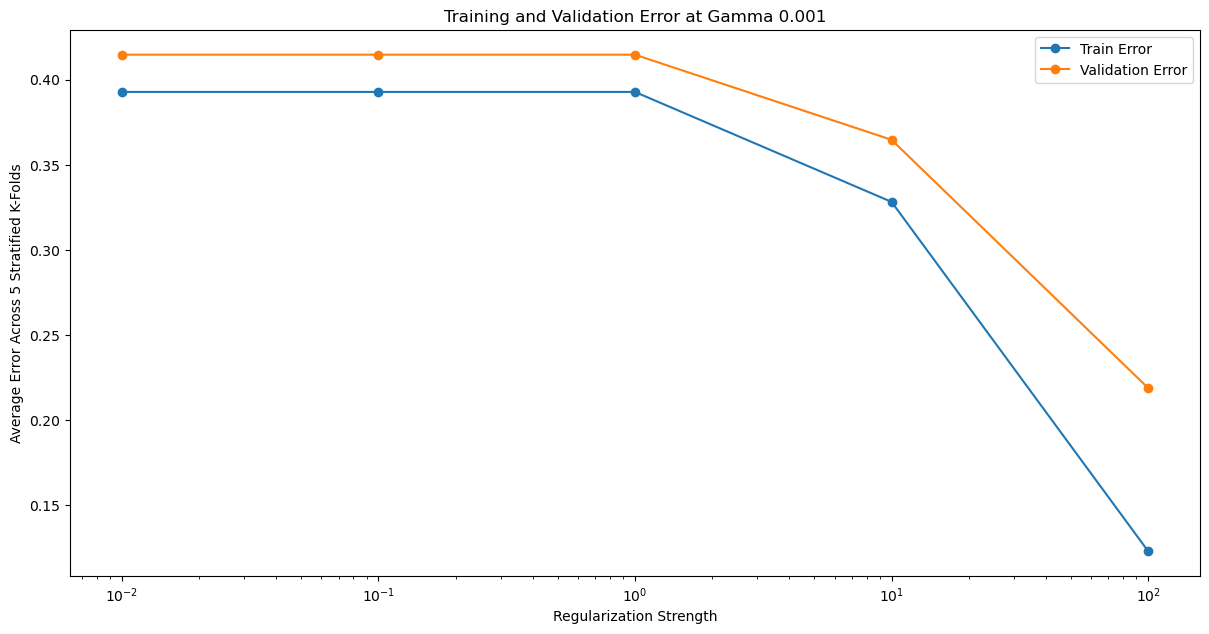

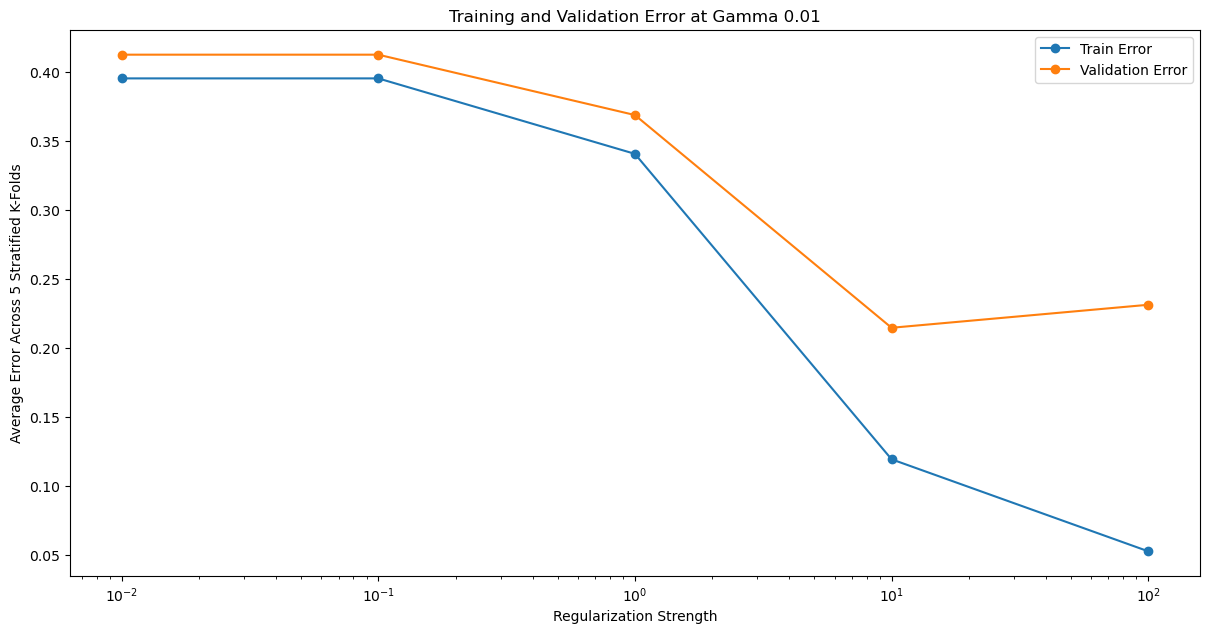

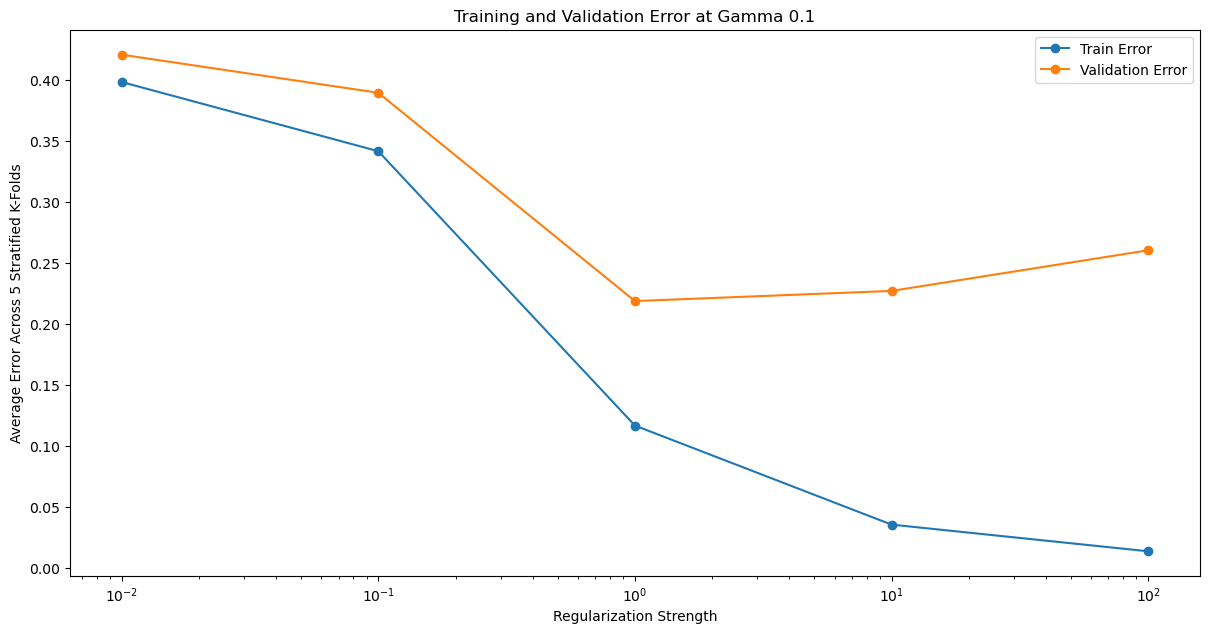

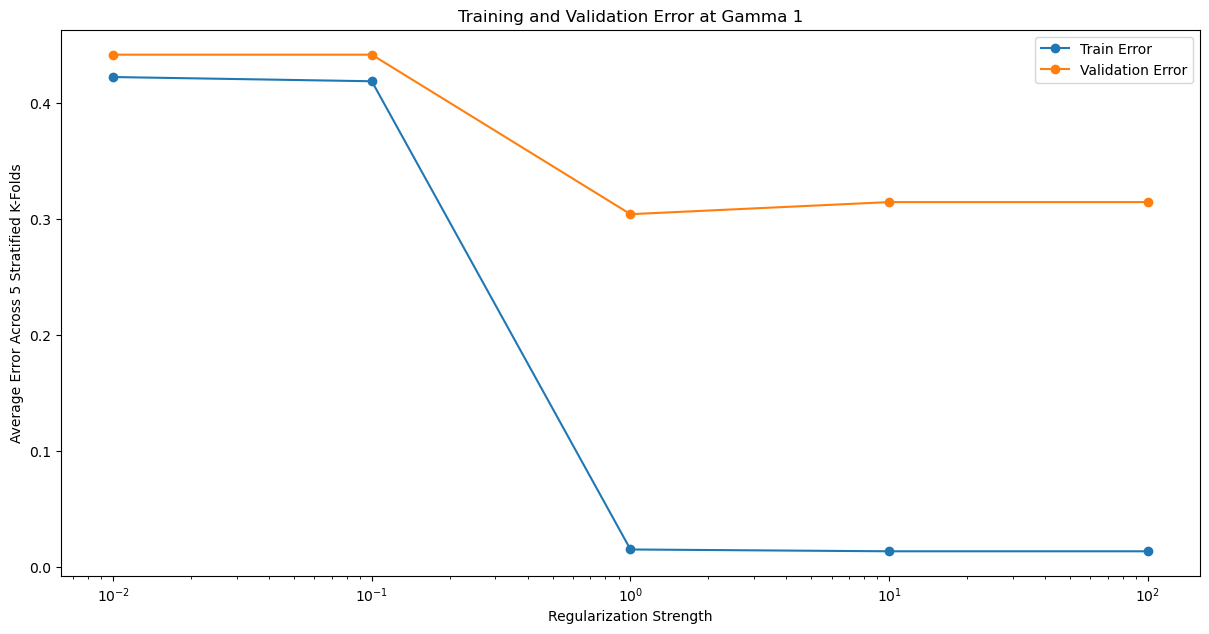

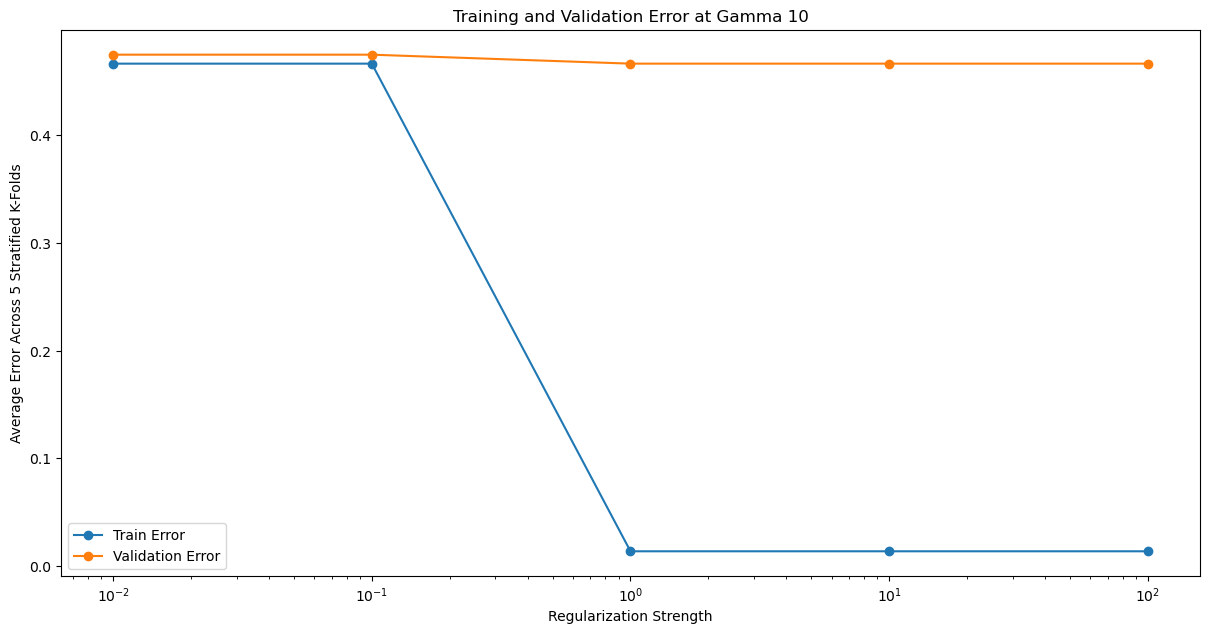

In [17]:

for gamma in gamma_values:
    plt.figure(figsize=(12,6))

    plt.plot(results[gamma]['C'], results[gamma]['train_error'], marker ='o', label="Train Error")
    plt.plot(results[gamma]['C'], results[gamma]['val_error'], marker = 'o', label="Validation Error")
    plt.legend()
    plt.tight_layout()
    plt.xscale('log')
    plt.xlabel("Regularization Strength")
    plt.ylabel("Average Error Across 5 Stratified K-Folds")
    plt.title(f"Training and Validation Error at Gamma {gamma}")
    plt.show()


In [18]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Features & labels
X = X_BoW
y = y_train_df['is_positive_sentiment'].values.ravel()

# Hyperparameters
C_values = [0.01, 0.1, 1, 10, 100]
gamma_values = [1e-3, 1e-2, 0.1, 1, 10]

# Stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {}

for C in C_values:
    for gamma in gamma_values:
        model = SVC(C=C, gamma=gamma, kernel='rbf')

        train_acc_fold = []
        val_acc_fold = []

        # Manual cross-validation
        for train_idx, val_idx in cv.split(X, y):
            X_train_fold, X_val_fold = X[train_idx], X[val_idx]
            y_train_fold, y_val_fold = y[train_idx], y[val_idx]

            model.fit(X_train_fold, y_train_fold)

            train_pred = model.predict(X_train_fold)
            val_pred = model.predict(X_val_fold)

            acc_train = accuracy_score(y_train_fold, train_pred)
            acc_val = accuracy_score(y_val_fold, val_pred)

            train_acc_fold.append(acc_train)
            val_acc_fold.append(acc_val)

        # Store mean errors across folds
        results[(C, gamma)] = {
            'train_error': 1 - np.mean(train_acc_fold),
            'val_error': 1 - np.mean(val_acc_fold),
            'train_acc_std': np.std(train_acc_fold),
            'val_acc_std': np.std(val_acc_fold)
        }

# Print results neatly
for (C, gamma), metrics in results.items():
    print(f"C={C}, gamma={gamma} -> "
f"Train Err: {metrics['train_error']:.4f}, "
f"Val Err: {metrics['val_error']:.4f}")

C=0.01, gamma=0.001 -> Train Err: 0.3923, Val Err: 0.3996
C=0.01, gamma=0.01 -> Train Err: 0.3944, Val Err: 0.4025
C=0.01, gamma=0.1 -> Train Err: 0.4027, Val Err: 0.4125
C=0.01, gamma=1 -> Train Err: 0.4219, Val Err: 0.4583
C=0.01, gamma=10 -> Train Err: 0.4811, Val Err: 0.4892
C=0.1, gamma=0.001 -> Train Err: 0.3923, Val Err: 0.3996
C=0.1, gamma=0.01 -> Train Err: 0.3944, Val Err: 0.4025
C=0.1, gamma=0.1 -> Train Err: 0.3467, Val Err: 0.3746
C=0.1, gamma=1 -> Train Err: 0.4065, Val Err: 0.4575
C=0.1, gamma=10 -> Train Err: 0.4811, Val Err: 0.4892
C=1, gamma=0.001 -> Train Err: 0.3923, Val Err: 0.3996
C=1, gamma=0.01 -> Train Err: 0.3295, Val Err: 0.3475
C=1, gamma=0.1 -> Train Err: 0.1185, Val Err: 0.2196
C=1, gamma=1 -> Train Err: 0.0158, Val Err: 0.2879
C=1, gamma=10 -> Train Err: 0.0147, Val Err: 0.4683
C=10, gamma=0.001 -> Train Err: 0.3223, Val Err: 0.3421
C=10, gamma=0.01 -> Train Err: 0.1202, Val Err: 0.2125
C=10, gamma=0.1 -> Train Err: 0.0340, Val Err: 0.2262
C=10, gamma=1 -

### Plotting average error across varying C values:

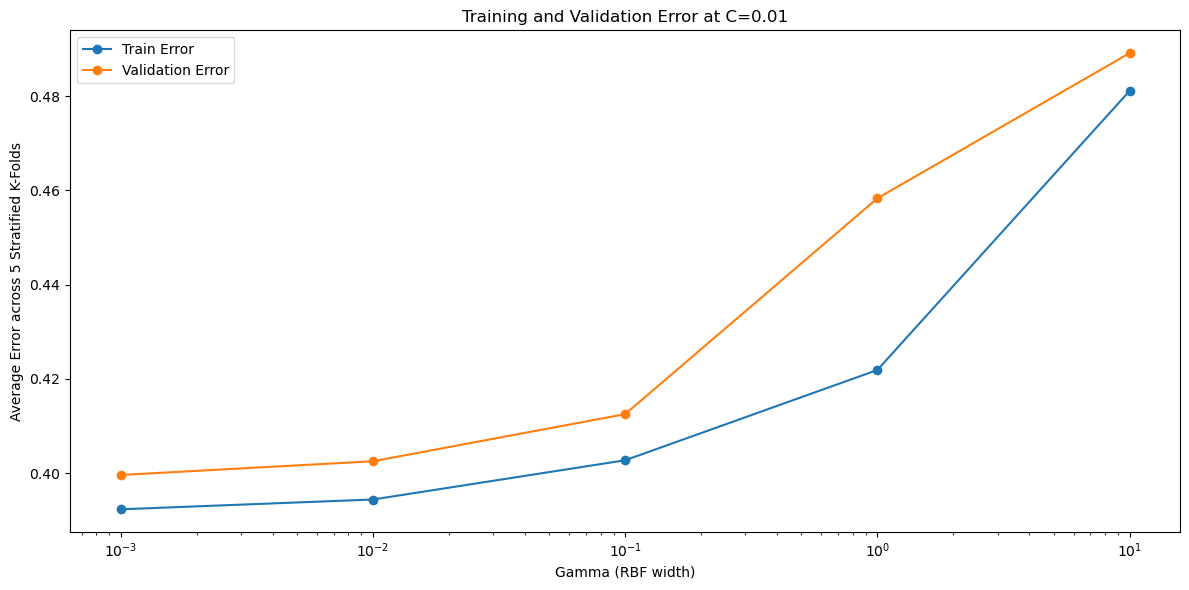

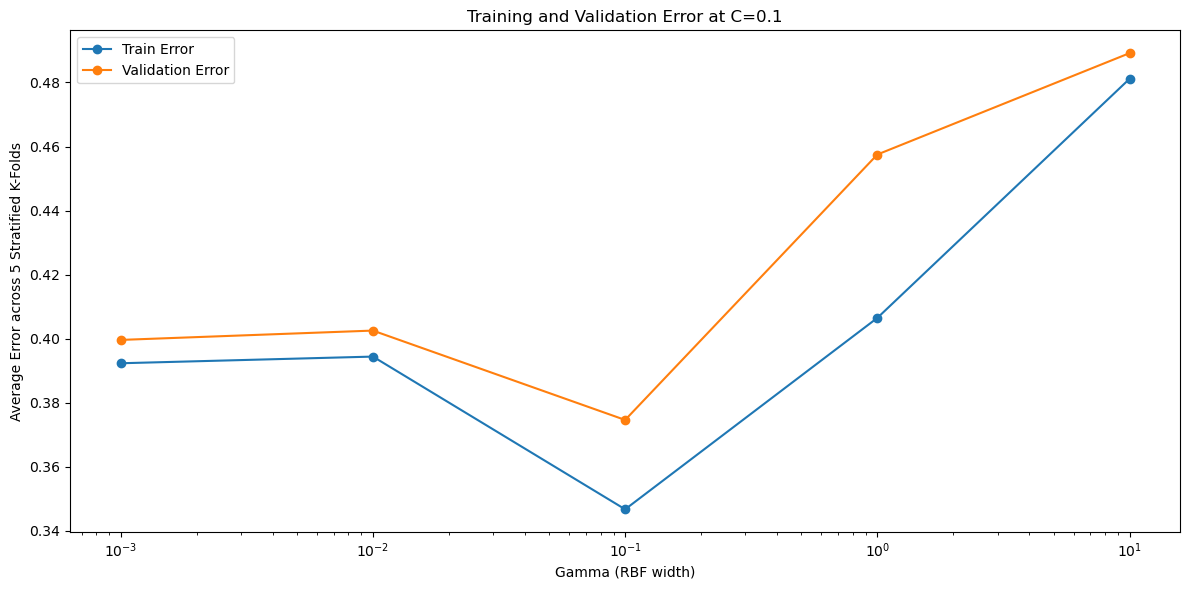

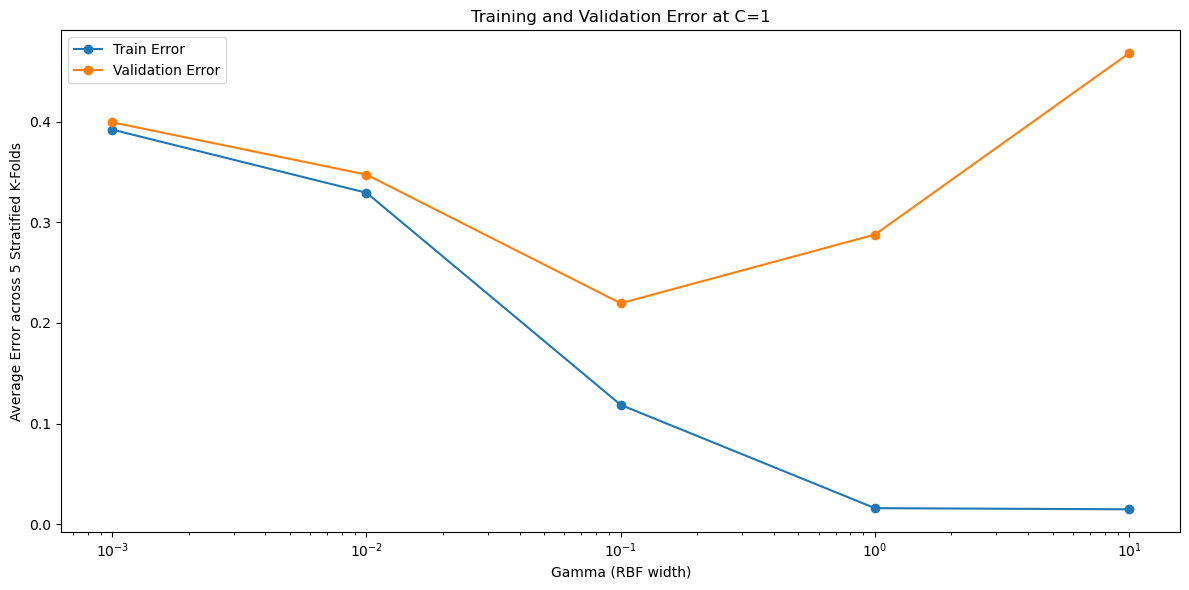

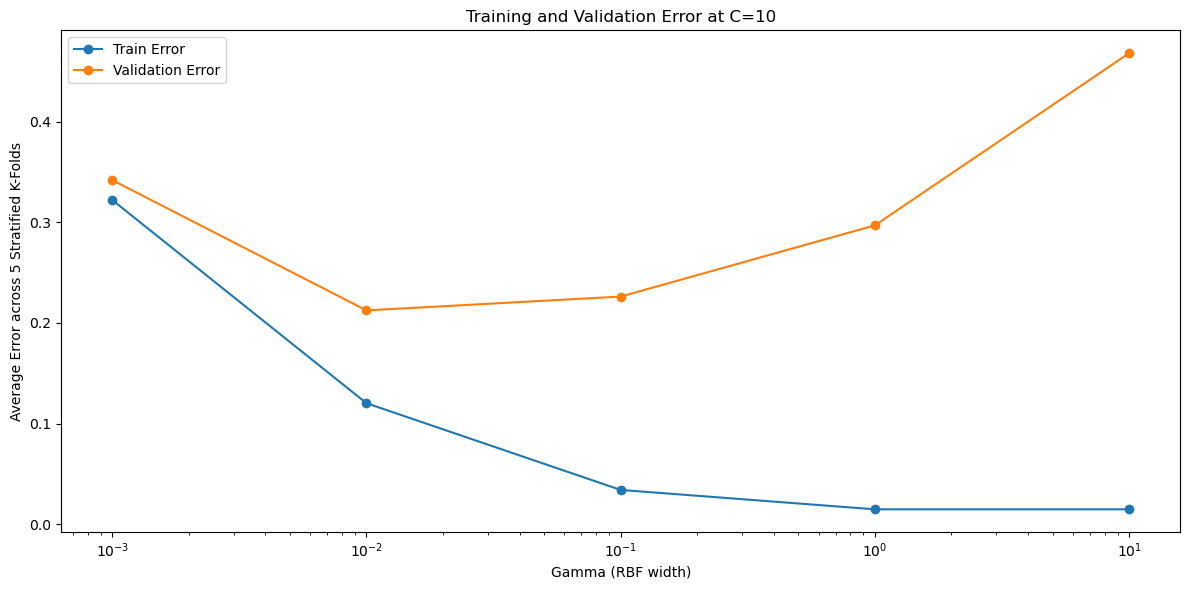

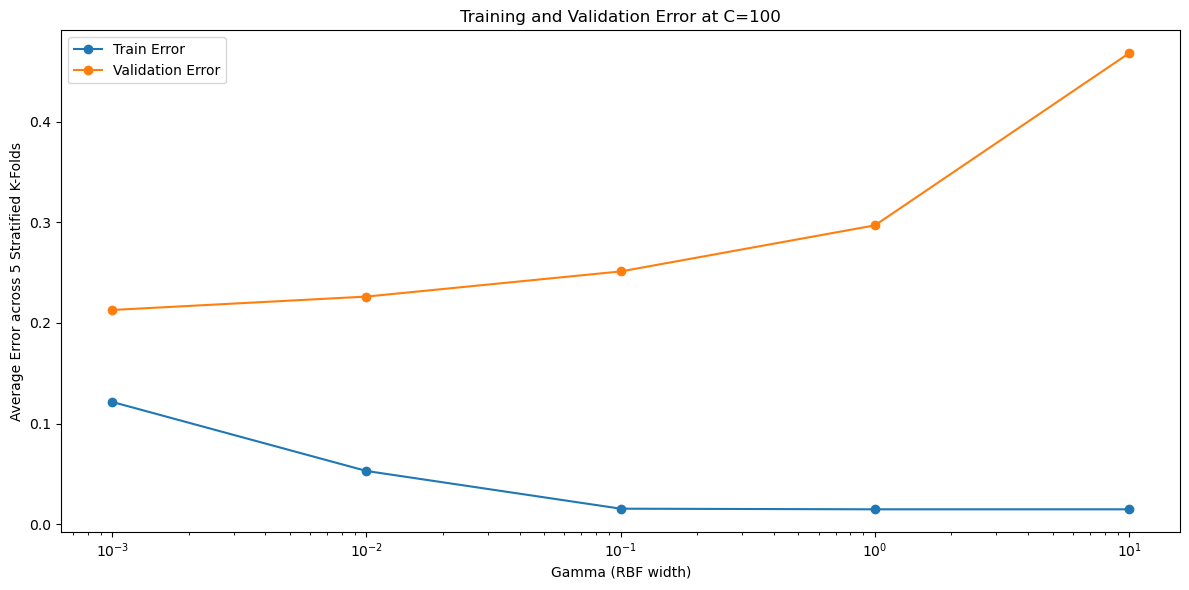

In [19]:
for C in C_values:
    pairs = [(g, results[(C, g)]["train_error"], results[(C, g)]["val_error"]) for g in gamma_values if (C, g) in results]
    pairs.sort(key=lambda t: t[0])
    g_list = [p[0] for p in pairs]
    tr_err = [p[1] for p in pairs]
    va_err = [p[2] for p in pairs]

    plt.figure(figsize=(12, 6))
    plt.plot(g_list, tr_err, marker='o', label="Train Error")
    plt.plot(g_list, va_err, marker='o', label="Validation Error")
    plt.xscale('log')
    plt.xlabel("Gamma (RBF width)")
    plt.ylabel("Average Error across 5 Stratified K-Folds")
    plt.title(f"Training and Validation Error at C={C}")
    plt.legend()
    plt.tight_layout()
    plt.show()

### Multilayer Perceptron Model:

* Generate a deep neural network model for your feature data. You must use a multilayer architecture (i.e., a true deep network with more than one hidden layer) and include nonlinear activation functions (e.g., ReLU, tanh). This model should go beyond a simple MLP by incorporating sufficient depth and capacity to capture complex patterns in the data. Produce the same sort of description and analysis for this model as you did for the previous one, including:

    * Variation of one or more hyperparameters (e.g., number of layers, number of neurons per layer, learning rate, regularization)
    * Cross-validation testing, clearly explaining how it was performed
    * At least one figure for each hyperparameter (minimum two total), showing how performance on training and validation data is affected as the hyperparameters change.
    * A brief analysis of your results: which settings worked best, any signs of overfitting, and
    what trade-offs you observed.

In [20]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [21]:
from tensorflow.keras.models import Sequential #sequential model builder - you stack layers in a linear order, where the output of one layer is fed directly as the input of another one
from tensorflow.keras.layers import Dense #fully connected (dense) layers, such that every neuron in the current layer receives input from every neuron in the previous layer
from tensorflow.keras.optimizers import Adam #Adaptive Moment Estimation, such that the learning rate is adjusted for each parameter individually and automatically
from tensorflow.keras.callbacks import EarlyStopping #stops the training if there is no improvement
from tensorflow.keras.utils import set_random_seed #ensures reproducibility when running the code

def build_mlp_model(input_dim, num_layers, learning_rate):
    """
    Constructs a deep neural network (MLP) model with ReLU activations.
    
    Args:
        input_dim (int): Number of input features.
        num_layers (int): Total number of hidden layers.
        learning_rate (float): Learning rate for the optimizer.
    
    Returns:
        Keras Sequential model.
    """
    model=Sequential()
    #Input layer(with ReLu activation) - this is the initial layer
    model.add(Dense(128, activation='relu', input_dim=input_dim)) # creates a fully connected layer with 128 neurons
    
    # _ is used when the loop value is not going to be used in the loop. Additionally, this loop runs from 0 to num_layers -1
    for _ in range(num_layers - 1): # loops to add more hidden layers, where each hidden layers has 128 neurons
        model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) # adds a single neuron in the final layer. Since the activation is sigmoid, we get a probability outcomes for the data points
    
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model
        
        


In [22]:
import scipy.sparse as sp

def cv_accuracy_simple(X, y, num_layers=2, lr=1e-3, epochs=15, batch_size=32, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    train_accs, val_accs = [], []

    for tr_idx, va_idx in skf.split(X, (y > 0.5).astype(int)):
        Xtr, Xva = X[tr_idx], X[va_idx]
        ytr, yva = y[tr_idx], y[va_idx]

        if sp.issparse(Xtr):
            Xtr = Xtr.tocsr(copy=False); Xtr.sort_indices(); Xtr = Xtr.toarray()
        if sp.issparse(Xva):
            Xva = Xva.tocsr(copy=False); Xva.sort_indices(); Xva = Xva.toarray()
        # ----------------------------------------------------------------------

        model = build_mlp_model(input_dim=X.shape[1], num_layers=num_layers, learning_rate=lr)
        model.fit(Xtr, ytr, epochs=epochs, batch_size=batch_size, verbose=0)

        train_acc = model.evaluate(Xtr, ytr, verbose=0)[1]
        val_acc   = model.evaluate(Xva, yva, verbose=0)[1]

        train_accs.append(1 - train_acc)
        val_accs.append(1 - val_acc)

    return {
        "mean_train_acc": float(np.mean(train_accs)),
        "mean_val_acc":   float(np.mean(val_accs)),
        "std_train_acc":  float(np.std(train_accs)),
        "std_val_acc":    float(np.std(val_accs)),
    }

# 2) Sweep two hyperparameters: num_layers and learning_rate ---
num_layers_list   = [1, 2, 3, 4]
learning_rate_list = [1e-4, 1e-3, 1e-2]

results = {}

for layers in num_layers_list:
    train_accs, val_accs = [], []
    for lr in learning_rate_list:
        res = cv_accuracy_simple(X, y, num_layers=layers, lr=lr, epochs=15, batch_size=32, n_splits=5)
        train_accs.append(res["mean_train_acc"])
        val_accs.append(res["mean_val_acc"])
    results[layers] = {
        "lrs": learning_rate_list,
        "train_acc": train_accs,
        "val_acc": val_accs
    }




/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwa

### Plotting average error across varying hidden layers:

1


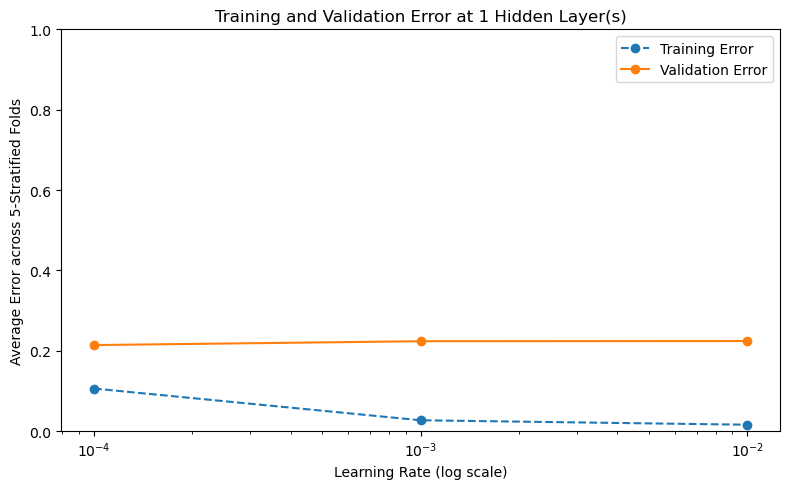

2


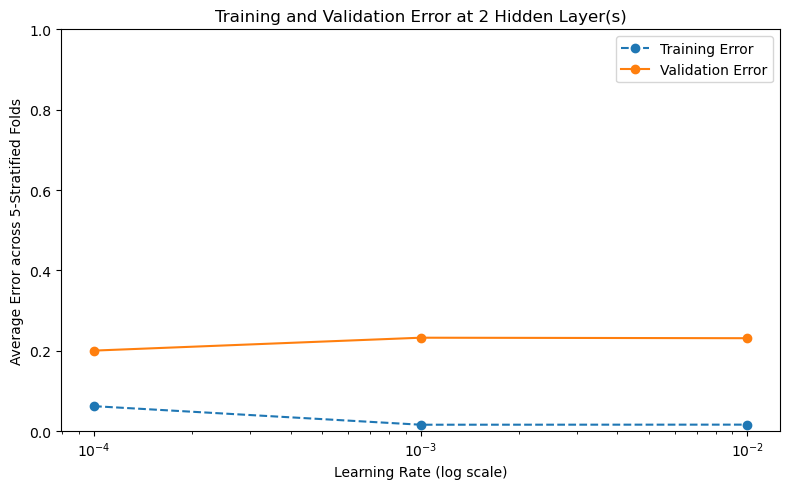

3


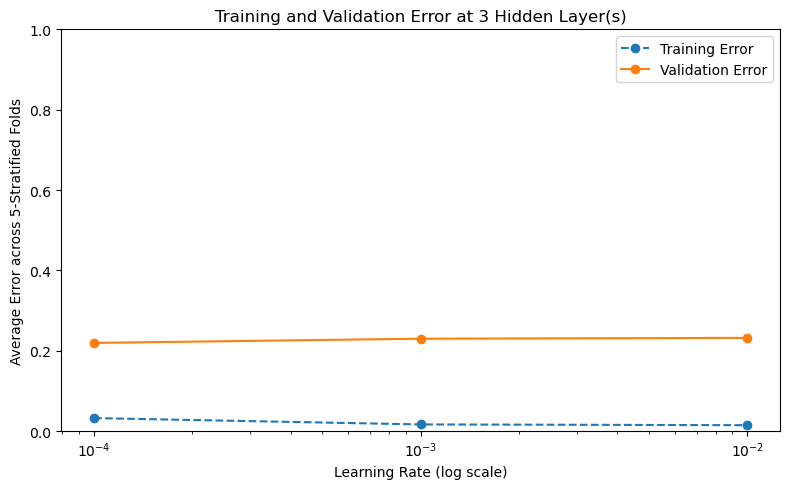

4


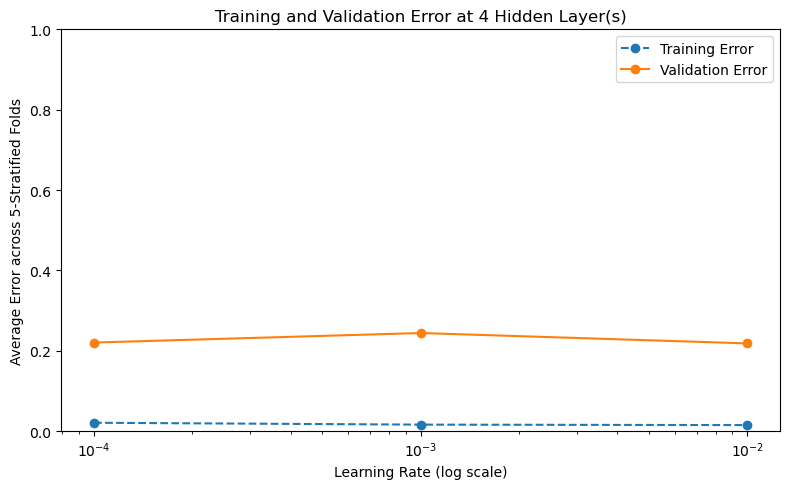

In [23]:
for layers in num_layers_list:
    print(layers)
    plt.figure(figsize=(8,5))
    plt.plot(results[layers]['lrs'], results[layers]['train_acc'], '--o', label='Training Error')
    plt.plot(results[layers]['lrs'], results[layers]['val_acc'],   '-o', label='Validation Error')
    plt.xscale('log')
    plt.ylim(0, 1)
    plt.xlabel('Learning Rate (log scale)')
    plt.ylabel('Average Error across 5-Stratified Folds')
    plt.title(f'Training and Validation Error at {layers} Hidden Layer(s)')
    plt.legend()
    plt.tight_layout()
    plt.show()

### Plotting average error across varying learning rates:


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwa

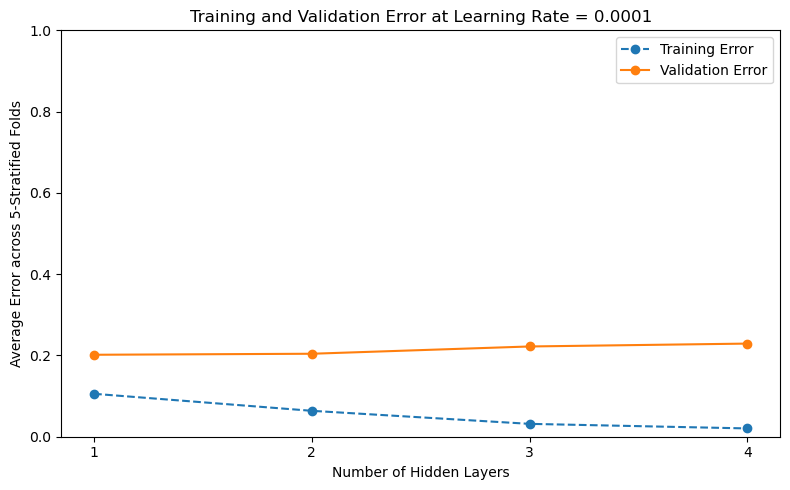

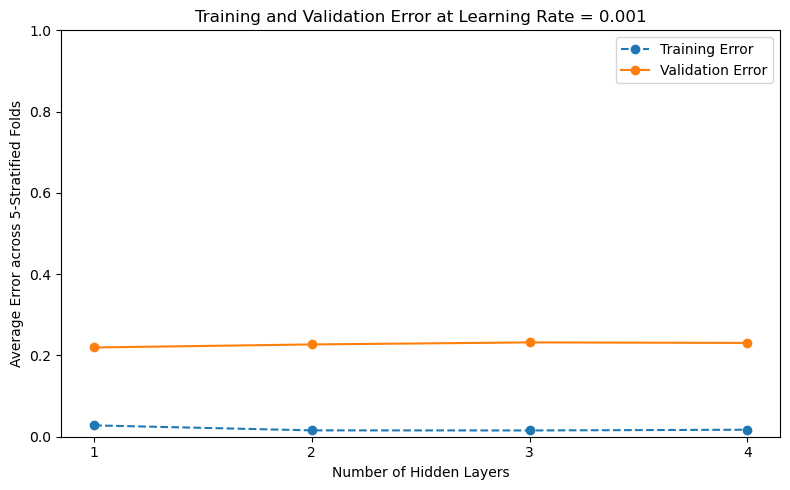

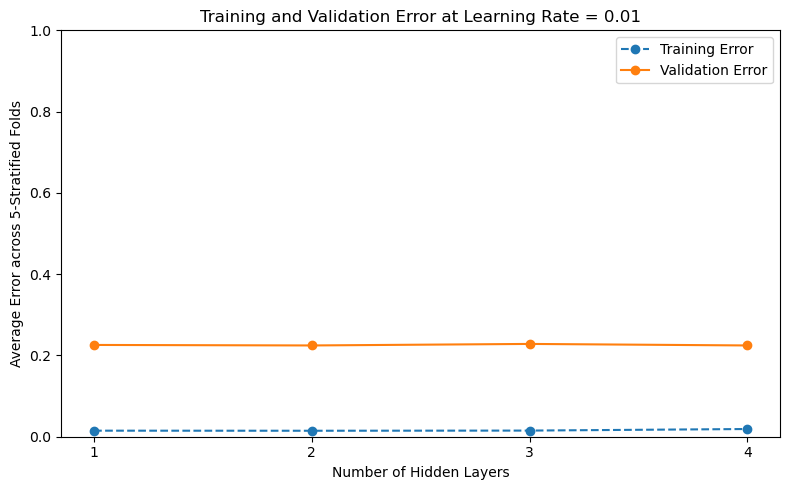

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp

num_layers_list    = [1, 2, 3, 4]
learning_rate_list = [1e-4, 1e-3, 1e-2]

results = {}

for lr in learning_rate_list:
    train_errs, val_errs = [], []
    for layers in num_layers_list:
        res = cv_accuracy_simple(
            X, y,
            num_layers=layers, lr=lr,
            epochs=15, batch_size=32, n_splits=5
        )
        train_errs.append(res["mean_train_acc"]) 
        val_errs.append(res["mean_val_acc"])
    results[lr] = {
        "layers": num_layers_list,
        "train_err": train_errs,
        "val_err": val_errs
    }

# ---- Plot: error vs #layers for each learning rate ----
for lr in learning_rate_list:
    plt.figure(figsize=(8,5))
    plt.plot(results[lr]["layers"], results[lr]["train_err"], '--o', label='Training Error')
    plt.plot(results[lr]["layers"], results[lr]["val_err"],   '-o',  label='Validation Error')
    plt.ylim(0, 1)
    plt.xticks(num_layers_list)
    plt.xlabel('Number of Hidden Layers')
    plt.ylabel('Average Error across 5-Stratified Folds')
    plt.title(f'Training and Validation Error at Learning Rate = {lr}')
    plt.legend()
    plt.tight_layout()
    plt.show()

### Random Forests:

* Generate a third model using Random Forests. 
    * Produce the same analysis as for the prior models, including a description of what you did, how hyperparameter variation affected results, and so forth. 
    * Figures are expected showing training/validation performance relative to hyperparameter variation; additional figures are allowed, of course.

In [25]:
from sklearn.ensemble import RandomForestClassifier

#Defining the hyperparameters to vary
#n_estimator shows you the number of trees that are build into the forest. Usually a larger number of trees results in more accuracy. 
# However, runs the risk of overfitting
n_estimator_list = [10,50,100,200,300]
max_depth_list = [3, 5, 10, 15, 20]   # Maximum depth of trees

rf_results = {}

# 5 Stratified cross fold
cv_rf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

for max_depth in max_depth_list:
    train_errors_rf = []
    val_errors_rf = []
    
    for n_estimator in n_estimator_list:
        clf = RandomForestClassifier(n_estimators=n_estimator, max_depth=max_depth, random_state=42)
        
        train_acc_fold_rf = []
        val_acc_fold_rf = []
        
        for train_idx_rf, val_idx_rf in cv.split(X, y):
            X_train_fold_rf, X_val_fold_rf =  X[train_idx_rf], X[val_idx_rf]
            y_train_fold_rf, y_val_fold_rf = y[train_idx_rf], y[val_idx_rf]
            
            clf.fit(X_train_fold_rf, y_train_fold_rf)
            train_pred_rf = clf.predict(X_train_fold_rf)
            val_pred_rf = clf.predict(X_val_fold_rf)
            
            train_acc_fold_rf.append(accuracy_score(y_train_fold_rf, train_pred_rf))
            val_acc_fold_rf.append(accuracy_score(y_val_fold_rf,val_pred_rf))
            
        # Store average error across folds
        train_errors_rf.append(1 - np.mean(train_acc_fold_rf))
        val_errors_rf.append(1 - np.mean(val_acc_fold_rf))

    rf_results[max_depth] = {
        'n_estimators': n_estimator_list,
        'train_error': train_errors_rf,
        'val_error': val_errors_rf
    }
    
print(rf_results)

{3: {'n_estimators': [10, 50, 100, 200, 300], 'train_error': [0.3521875, 0.24187499999999995, 0.22781249999999997, 0.21947916666666667, 0.21291666666666664], 'val_error': [0.36791666666666667, 0.28166666666666673, 0.26875000000000004, 0.2550000000000001, 0.25208333333333344]}, 5: {'n_estimators': [10, 50, 100, 200, 300], 'train_error': [0.3142708333333333, 0.24291666666666667, 0.2227083333333334, 0.21552083333333338, 0.21489583333333329], 'val_error': [0.3454166666666667, 0.29208333333333336, 0.26583333333333337, 0.26041666666666663, 0.2579166666666667]}, 10: {'n_estimators': [10, 50, 100, 200, 300], 'train_error': [0.259375, 0.21677083333333336, 0.20614583333333325, 0.20395833333333324, 0.20343749999999994], 'val_error': [0.3095833333333333, 0.2645833333333333, 0.2545833333333334, 0.25624999999999987, 0.2516666666666667]}, 15: {'n_estimators': [10, 50, 100, 200, 300], 'train_error': [0.21854166666666663, 0.19895833333333324, 0.1892708333333335, 0.18822916666666667, 0.18947916666666664

### Plotting the average error across varying tree depths:

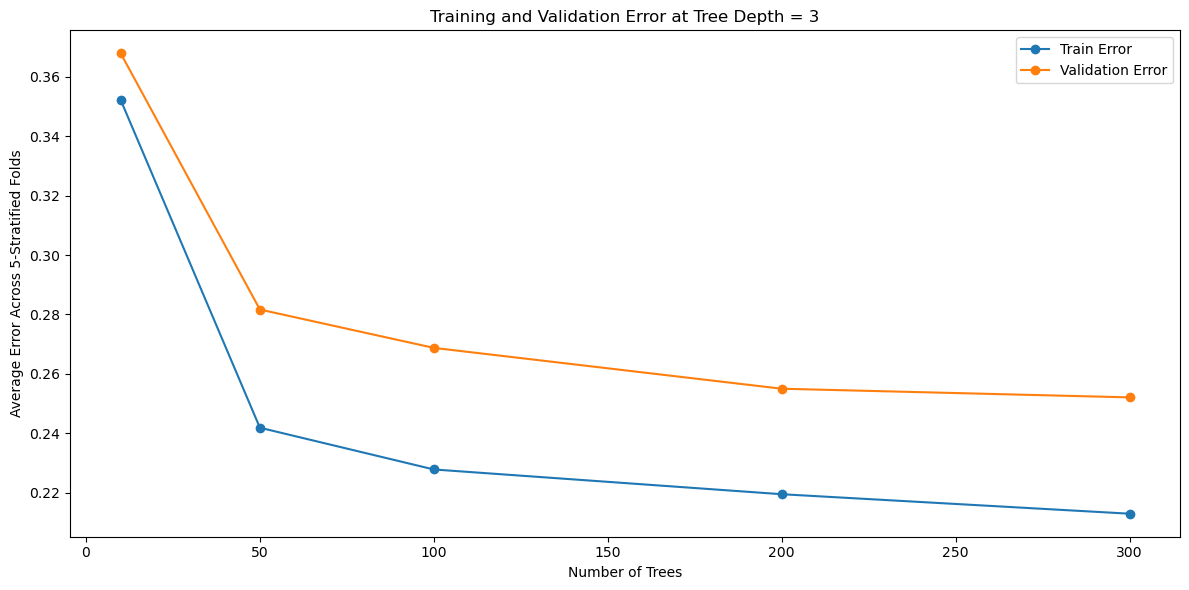

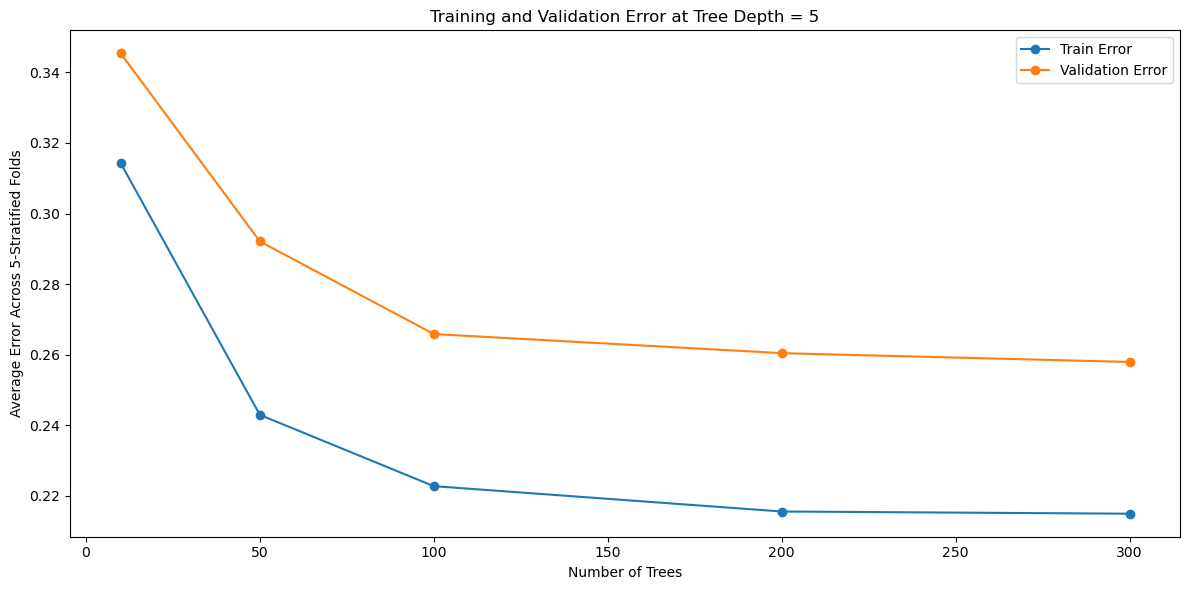

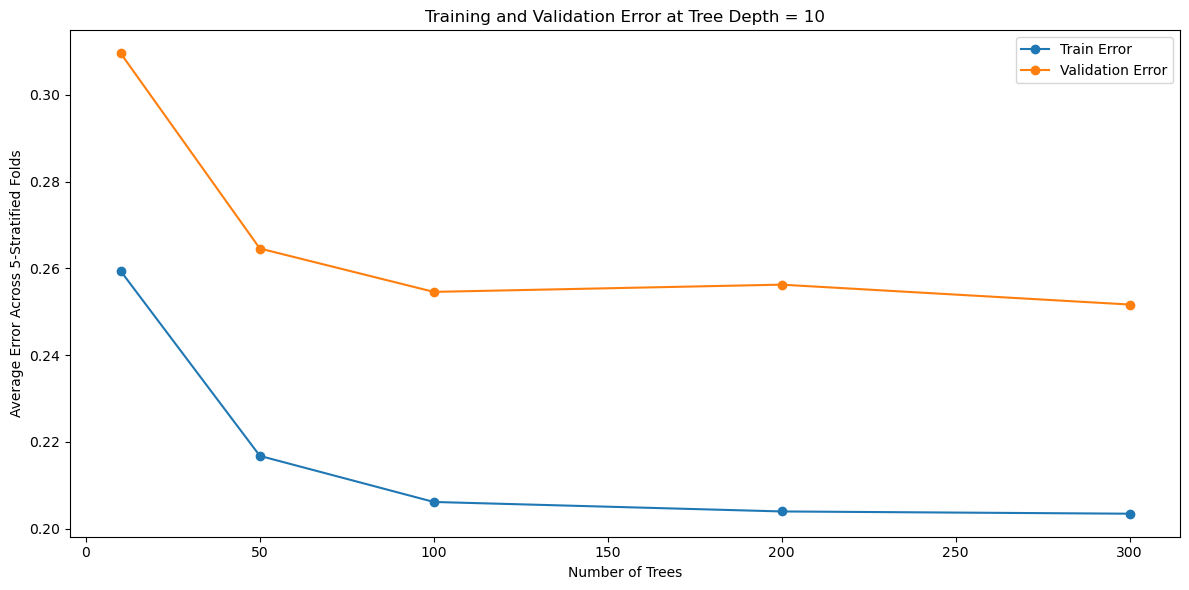

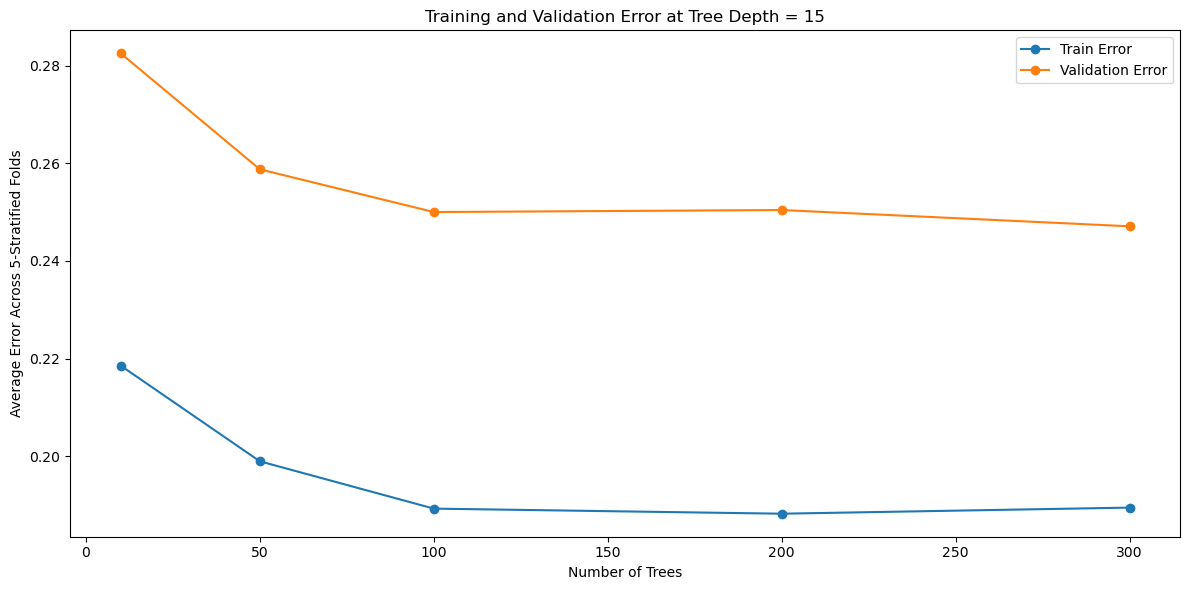

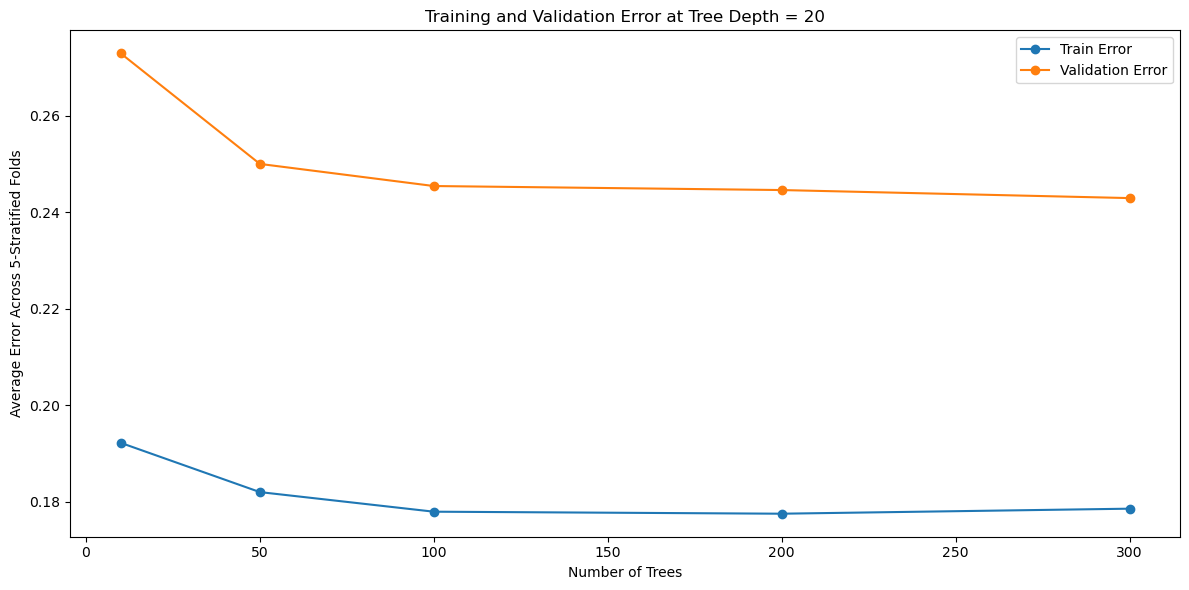

In [26]:
import matplotlib.pyplot as plt

for m in max_depth_list:
    plt.figure(figsize=(12,6))    
    plt.plot(rf_results[m]['n_estimators'], rf_results[m]['train_error'], marker ='o',  label="Train Error")
    plt.plot(rf_results[m]['n_estimators'], rf_results[m]['val_error'], marker = 'o', label="Validation Error")
    plt.xlabel('Number of Trees')
    plt.ylabel("Average Error Across 5-Stratified Folds")
    plt.title(f'Training and Validation Error at Tree Depth = {m}')
    plt.tight_layout()
    plt.legend()
    plt.show()
    
        

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Features & labels
X = X_BoW
y = y_train_df['is_positive_sentiment'].values.ravel()

# Hyperparameters
n_estimator_list = [10, 50, 100, 200, 300]
max_depth_list = [3, 5, 10, 15, 20]

rf_results_depth = {}

# Stratified CV
cv_rf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

for n_estimator in n_estimator_list:
    train_errors_rf = []
    val_errors_rf = []
    train_acc_std_rf = []
    val_acc_std_rf = []
    
    for max_depth in max_depth_list:
        clf = RandomForestClassifier(
            n_estimators=n_estimator,
            max_depth=max_depth,
            random_state=42,
            n_jobs=-1
        )
        
        train_acc_fold_rf = []
        val_acc_fold_rf = []
        
        for train_idx_rf, val_idx_rf in cv_rf.split(X, y):
            X_train_fold_rf, X_val_fold_rf = X[train_idx_rf], X[val_idx_rf]
            y_train_fold_rf, y_val_fold_rf = y[train_idx_rf], y[val_idx_rf]
            
            clf.fit(X_train_fold_rf, y_train_fold_rf)
            train_pred_rf = clf.predict(X_train_fold_rf)
            val_pred_rf = clf.predict(X_val_fold_rf)
            
            train_acc_fold_rf.append(accuracy_score(y_train_fold_rf, train_pred_rf))
            val_acc_fold_rf.append(accuracy_score(y_val_fold_rf, val_pred_rf))
            
        train_errors_rf.append(1 - np.mean(train_acc_fold_rf))
        val_errors_rf.append(1 - np.mean(val_acc_fold_rf))
        train_acc_std_rf.append(np.std(train_acc_fold_rf))
        val_acc_std_rf.append(np.std(val_acc_fold_rf))

    rf_results_depth[n_estimator] = {
        'max_depth': max_depth_list,
        'train_error': train_errors_rf,
        'val_error': val_errors_rf,
        'train_acc_std': train_acc_std_rf,
        'val_acc_std': val_acc_std_rf
    }

print(rf_results_depth)

{10: {'max_depth': [3, 5, 10, 15, 20], 'train_error': [0.3521875, 0.3142708333333333, 0.259375, 0.21854166666666663, 0.19218749999999996], 'val_error': [0.36791666666666667, 0.3454166666666667, 0.3095833333333333, 0.2825, 0.2729166666666667], 'train_acc_std': [0.01770649500261916, 0.023946101950236314, 0.008942573346389475, 0.007046472718869899, 0.005705443307345466], 'val_acc_std': [0.02284458360312132, 0.022220486043288985, 0.022228297780581885, 0.016541194367732683, 0.01020620726159658]}, 50: {'max_depth': [3, 5, 10, 15, 20], 'train_error': [0.24187499999999995, 0.24291666666666667, 0.21677083333333336, 0.19895833333333324, 0.1819791666666667], 'val_error': [0.28166666666666673, 0.29208333333333336, 0.2645833333333333, 0.25875000000000004, 0.25], 'train_acc_std': [0.0038499413776200402, 0.009550441743710076, 0.008296794896558289, 0.008570834346135068, 0.008952275083277247], 'val_acc_std': [0.017450326326143267, 0.017648182153789452, 0.007905694150420967, 0.006640573937712188, 0.0072

### Plotting the average error across varying number of trees:

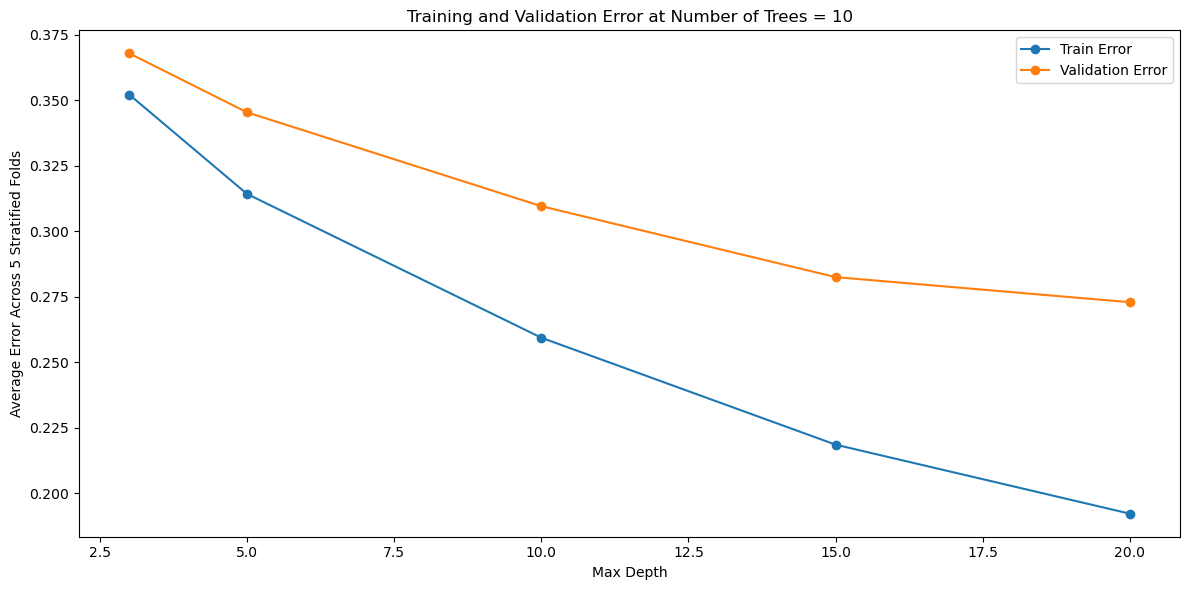

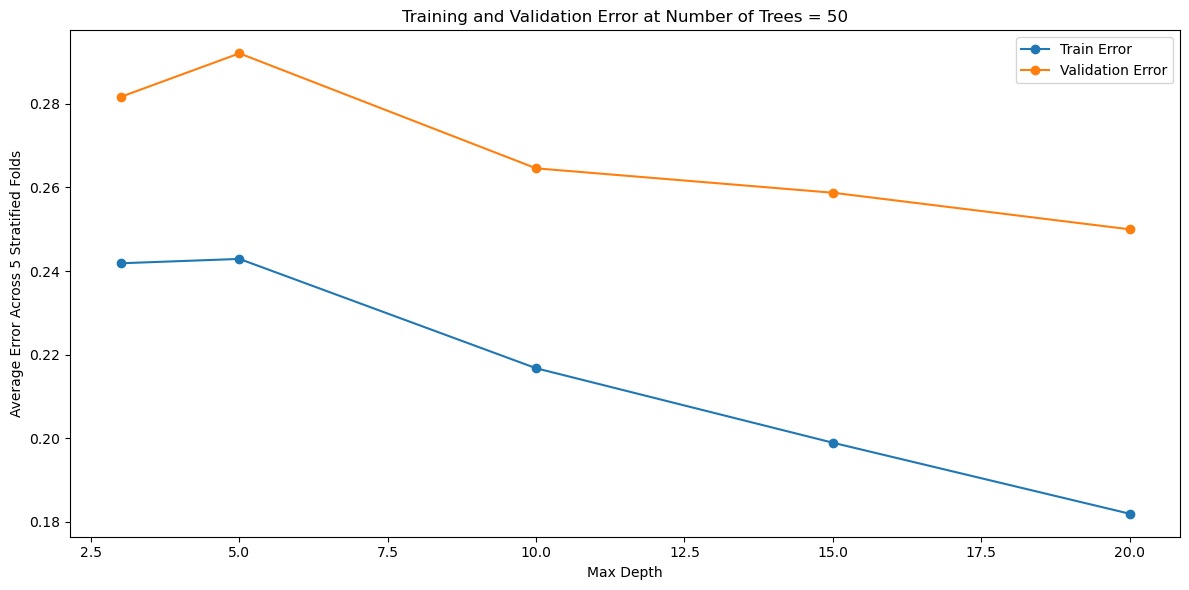

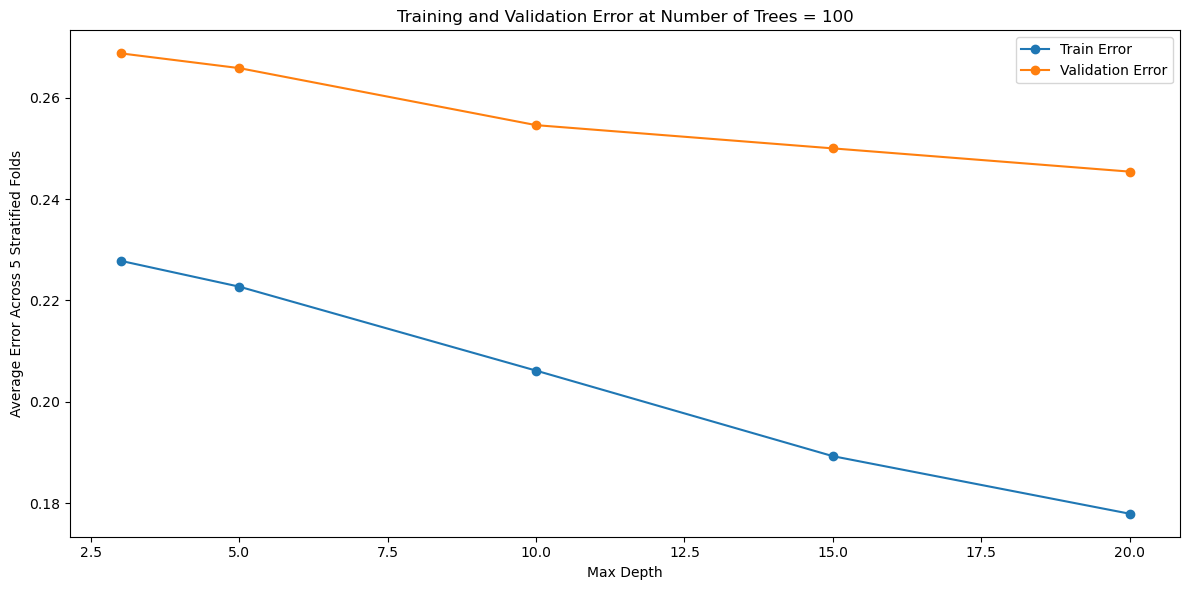

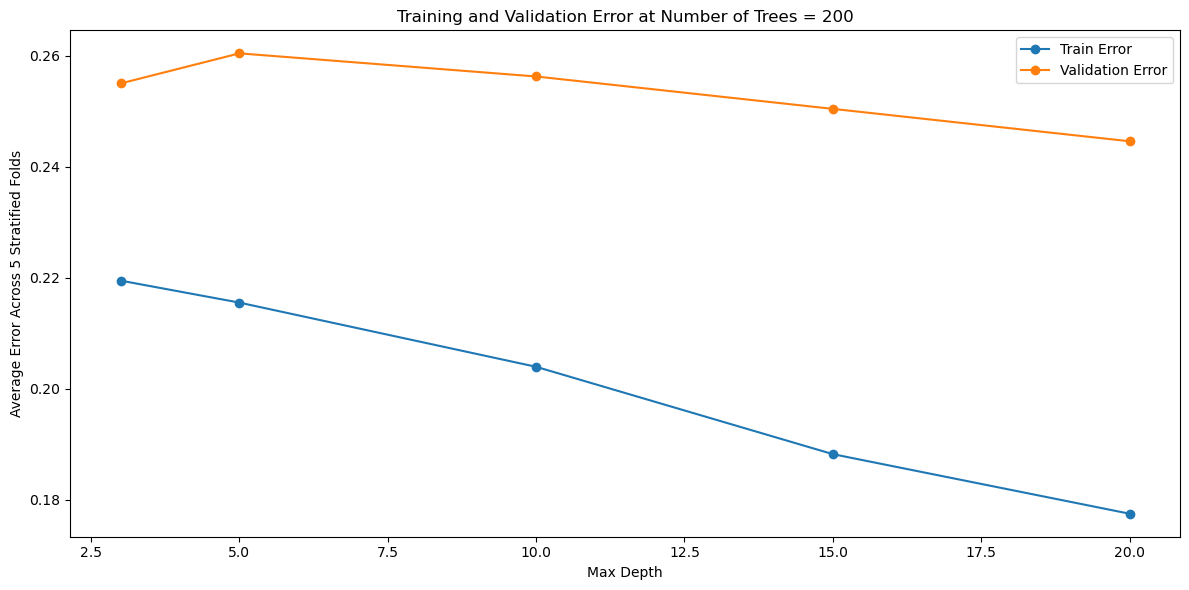

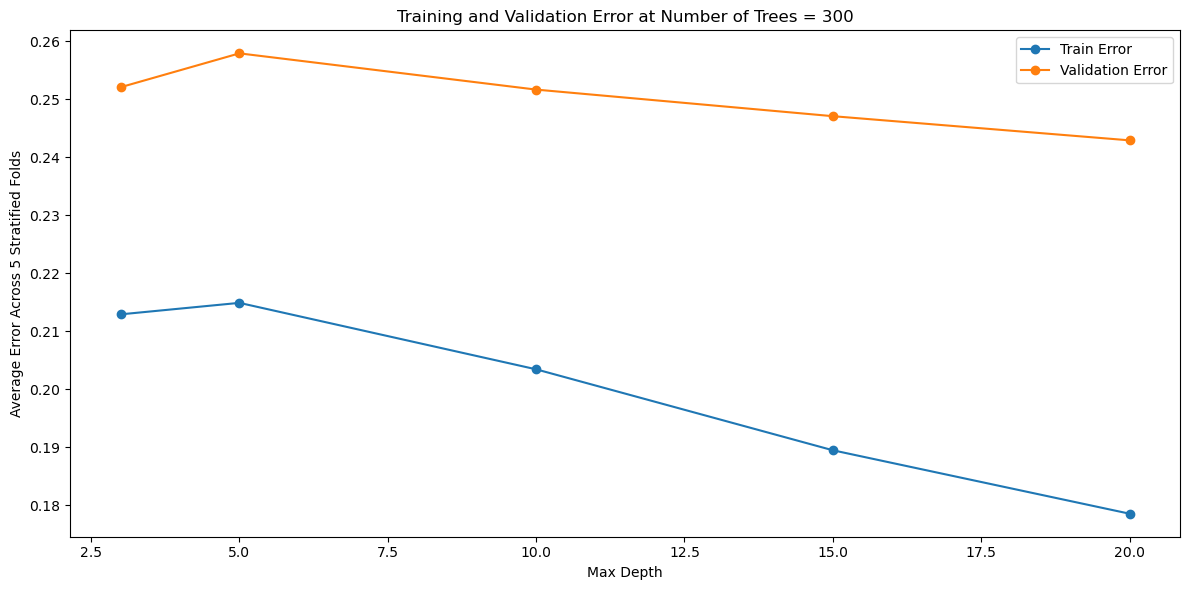

In [28]:
import matplotlib.pyplot as plt

for n in n_estimator_list:
    plt.figure(figsize=(12, 6))
    plt.plot(rf_results_depth[n]['max_depth'], rf_results_depth[n]['train_error'], marker='o', label="Train Error")
    plt.plot(rf_results_depth[n]['max_depth'], rf_results_depth[n]['val_error'], marker='o', label="Validation Error")
    
    plt.xlabel('Max Depth')
    plt.ylabel("Average Error Across 5 Stratified Folds")
    plt.title(f'Training and Validation Error at Number of Trees = {n}')
    plt.tight_layout()
    plt.legend()
    plt.show()

### Testing the best model, i.e., MLP Classifier:


In [29]:
import numpy as np
import scipy.sparse as sp
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# --------------------------------------------------------
# 1. original build_mlp_model
# --------------------------------------------------------
def build_mlp_model(input_dim, num_layers, learning_rate):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=input_dim))
    for _ in range(num_layers - 1):
        model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# --------------------------------------------------------
# 2. original CV function with sparse fix
# --------------------------------------------------------
def cv_accuracy_simple(X, y, num_layers=2, lr=1e-3, epochs=15, batch_size=32, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    train_accs, val_accs = [], []

    for tr_idx, va_idx in skf.split(X, (y > 0.5).astype(int)):
        Xtr, Xva = X[tr_idx], X[va_idx]
        ytr, yva = y[tr_idx], y[va_idx]

        # Sparse fix
        if sp.issparse(Xtr):
            Xtr = Xtr.tocsr(copy=False); Xtr.sort_indices(); Xtr = Xtr.toarray()
        if sp.issparse(Xva):
            Xva = Xva.tocsr(copy=False); Xva.sort_indices(); Xva = Xva.toarray()

        model = build_mlp_model(input_dim=X.shape[1], num_layers=num_layers, learning_rate=lr)
        model.fit(Xtr, ytr, epochs=epochs, batch_size=batch_size, verbose=0)

        train_acc = model.evaluate(Xtr, ytr, verbose=0)[1]
        val_acc   = model.evaluate(Xva, yva, verbose=0)[1]

        train_accs.append(1 - train_acc)
        val_accs.append(1 - val_acc)

    return {
        "mean_train_acc": float(np.mean(train_accs)),
        "mean_val_acc":   float(np.mean(val_accs)),
        "std_train_acc":  float(np.std(train_accs)),
        "std_val_acc":    float(np.std(val_accs)),
    }

# --------------------------------------------------------
# 3. Sweep hyperparameters (unchanged)
# --------------------------------------------------------
num_layers_list   = [1, 2, 3, 4]
learning_rate_list = [1e-4, 1e-3, 1e-2]

results = {}
for layers in num_layers_list:
    train_accs, val_accs = [], []
    for lr in learning_rate_list:
        res = cv_accuracy_simple(X, y, num_layers=layers, lr=lr, epochs=15, batch_size=32, n_splits=5)
        train_accs.append(res["mean_train_acc"])
        val_accs.append(res["mean_val_acc"])
    results[layers] = {
        "lrs": learning_rate_list,
        "train_acc": train_accs,
        "val_acc": val_accs
    }

# --------------------------------------------------------
# 4. Pick best hyperparams (lowest mean validation error)
# --------------------------------------------------------
best_layers = None
best_lr = None
best_val_err = float('inf')

for layers in num_layers_list:
    for lr, val_err in zip(results[layers]['lrs'], results[layers]['val_acc']):
        if val_err < best_val_err:
            best_val_err = val_err
            best_layers = layers
            best_lr = lr

# --------------------------------------------------------
# 5. Retrain best model on all training data
# --------------------------------------------------------
train_columns = getattr(X, 'columns', None)  # None if not pandas

X_train_full, y_train_full = X, y
if sp.issparse(X_train_full):
    X_train_full = X_train_full.tocsr(copy=False); X_train_full.sort_indices(); X_train_full = X_train_full.toarray()
else:
    X_train_full = np.asarray(X_train_full)
    if X_train_full.dtype == object:
        X_train_full = X_train_full.astype(np.float32)
    else:
        X_train_full = X_train_full.astype(np.float32, copy=False)

# Also ensure y is numeric
y_train_full = np.asarray(y_train_full).astype(np.float32, copy=False)

final_model = build_mlp_model(input_dim=X_train_full.shape[1], num_layers=best_layers, learning_rate=best_lr)
final_model.fit(X_train_full, y_train_full, epochs=15, batch_size=32, verbose=0)

# --------------------------------------------------------
# 6. Predict probabilities on test set and save
# --------------------------------------------------------
# If X is a pandas DataFrame and X_test is too, align columns to training
if train_columns is not None and hasattr(X_test, 'reindex'):
    X_test = X_test.reindex(columns=train_columns, fill_value=0)

if sp.issparse(X_test):
    X_test = X_test.tocsr(copy=False); X_test.sort_indices(); X_test = X_test.toarray()
else:
    X_test = np.asarray(X_test)
    if X_test.dtype == object:
        X_test = X_test.astype(np.float32)
    else:
        X_test = X_test.astype(np.float32, copy=False)

assert X_test.shape[1] == X_train_full.shape[1], (
    f"Feature mismatch at predict time: X_test has {X_test.shape[1]} columns, "
    f"but the model expects {X_train_full.shape[1]}. "
    "Apply the same preprocessing/vectorizer used for training or align columns."
)

y_proba = final_model.predict(X_test).ravel()
np.savetxt("yproba1_test.txt", y_proba, fmt="%.6f")

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwa

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [30]:
y_proba = final_model.predict(X_test).ravel()
y_pred = (y_proba >= 0.5).astype(int)   # 0 if < 0.5, else 1
np.savetxt("yproba1_test.txt", y_pred, fmt="%d")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
